In [1]:
import numpy as np 
import tensorflow as tf

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1145786698490051552,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2912380519
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8051729015212101929
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [4]:

tf.test.is_built_with_cuda()

True

In [5]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[4999].shape

(32, 32, 3)

In [8]:
Y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
classes = ['aiplane',"automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
    print(classes[Y_train[index][0]])

frog


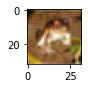

In [10]:
plot_sample(0)

truck


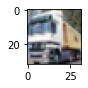

In [11]:
plot_sample(1)

truck


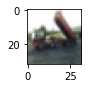

In [12]:
plot_sample(2)

##ONE HOT ENCODING ON CATEGORICAL DATA OF Y_train TO MAKE IT NUMERICAL


In [13]:
from tensorflow import keras
Y_test_categorical = keras.utils.to_categorical(Y_test,num_classes=10,dtype='float32')
Y_train_categorical = keras.utils.to_categorical(Y_train,num_classes=10,dtype='float32')
Y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
print(Y_train.shape)
Y_train_categorical.shape

(50000, 1)


(50000, 10)

#SCALING THE RBG VALUES IN PIXEL -  DIVIDING BY 255 AS THE VALUES ANRE IN RANGE OF 0-255

In [194]:
X_train = X_train/255
X_test = X_test/255
#X_train #one pixel

In [16]:
X_train[0].shape


(32, 32, 3)

#training the model

In [18]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),   #3000 = no.of neural roughly equal to no.of input pixels =  32*32*3
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_train,Y_train_categorical,epochs=50)    

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8134 - accuracy: 0.3537
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6256 - accuracy: 0.4272
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5434 - accuracy: 0.4561
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4838 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4337 - accuracy: 0.4961
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3901 - accuracy: 0.5117
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3541 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3179 - accuracy: 0.5373
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2820 - accuracy: 0.5499
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - l

In [55]:
classes[np.argmax(model.predict(X_test)[0])]

'cat'

In [195]:
classes[Y_test[0][0]]

'cat'

In [196]:
model.evaluate(X_test,Y_test_categorical)

313/313 [==============================] - 3s 6ms/step - loss: 5.1686 - accuracy: 0.1000


[5.168574810028076, 0.10000000149011612]

#COMPARING CPU AND GPU SPEED

In [29]:
def getmodel():
    model =  keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000,activation='relu'),   #3000 = no.of neural roughly equal to no.of input pixels =  32*32*3
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')   
    ])
    model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']) 
    return model


In [32]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = getmodel()
    cpu_model.fit(X_train,Y_train_categorical,epochs =1)

1563/1563 [==============================] - 76s 48ms/step - loss: 1.8085 - accuracy: 0.3579
1min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = getmodel()
    gpu_model.fit(X_train,Y_train_categorical,epochs=1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.8127 - accuracy: 0.3534
10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [181]:
import cv2 as cv
img =  cv.imread('firetruck.jpg')
img.shape

(3024, 4032, 3)

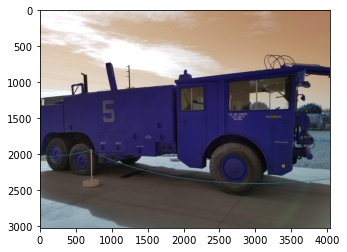

In [182]:
plt.imshow(img)

In [183]:
img.shape

(3024, 4032, 3)

In [185]:
#img = cv.resize(img,(32,32))
img = img.reshape(-1,32,32,3)
img.shape

(11907, 32, 32, 3)

In [186]:
img= img/255

In [193]:
img[400][0][0]

array([0.73333333, 0.59607843, 0.46666667])

In [190]:
img[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.90980392, 0.87058824, 0.87058824],
        [0.90980392, 0.87058824, 0.87058824],
        [0.90588235, 0

In [180]:
classes[np.argmax(model.predict(img)[0])]

InvalidArgumentError:  In[0] mismatch In[1] shape: 96 vs. 3072: [32,96] [3072,3000] 0 0
	 [[node sequential/dense/MatMul (defined at <ipython-input-127-a59b8e0bb15a>:1) ]] [Op:__inference_predict_function_168539]

Function call stack:
predict_function
